# Bird Population Decline in the United States
Calvin Davis, Sabine May, Braden Nowicki, Hudson Jones


## Introduction
Recent studies have shown a staggering decline in bird populations across North America since 1970 ([Nearly 3 Billion Birds Gone](https://www.birds.cornell.edu/home/bring-birds-back/#:~:text=NARRATOR%3A%20Birds%20are%20losing%20the,toxic%20pesticides%20and%20insect%20declines.)) Worldwide, we are seeing a similarly dramatic loss of biodiversity. These are consequences of a changing world, a world pushed to the brink by human activity. It is of utmost importance that we understand, address, and potentially alleviate these harmful changes.

More than ever, data science is an integral part of developing such understanding and promoting positive change in the world. The subject of bird loss - along with a wider range of environmental/conservation subjects - will benefit greatly from the application of quality data science. This project is therefore a pertinent exercise in using data science for positive change, as well as a fantastic example of the power of data science in the current day.

In this report, we present the complete data science pipeline, incorporating the following steps:

1. Data Collection
2. Data Processing
3. Exploratory Data Analysis and Visualization
4. Hypothesis Testing and Machine Learning
5. Insight and Policy Decision

The issue of bird population decline is a complex and nuanced one, but we hope to provide the reader with an improved understanding of some critical factors through our analysis, such as habitat loss, urbanization/human activity, commercial building density, tree cover loss, and temperature increase due to climate change. These factors barely scratch the surface of the complex ways ecosystems and biodiversity respond to widespread change, but analyzing them in connection with bird population decline will hopefully prompt us to consider the environmental impacts of what we do. On a local level, a national level, and an international level, we can implement policies that curtail this dramatic bird loss; to do so, we must first understand what the data tells us.

This project was done using [IPython](https://ipython.org/) and [Jupyter Notebooks](https://jupyter.org/), which provide easy and interactive coding environments for Python.

## Data Collection

In this part of the data science pipeline, we bring together multiple trustworthy sources of data.
Please read the following descriptions of the 5 datasets used in this project.

### North American Breeding Bird Survey Dataset

The primary data set we will be working with is the [North American Breeding Bird Survey Dataset](https://www.sciencebase.gov/catalog/item/52b1dfa8e4b0d9b325230cd9). This is a cohesive, well-maintained, and annually-updated dataset containing bird count data across North America. The data is organized by state and, within each state, by route. Routes are designated paths/locations where skilled avian identifiers (birders) use their ears and eyes to count all birds in the area (by species). Typically, bird counts at a route are done in June of each year. This dataset is widely used by environmental and federal agencies to track the population health of over 700 species of birds.

We will be using this dataset to measure bird population data and, in particular, population decline over the years 1966-2022 (included in the 2023 data release). Note that there is no data for 2020 because the BBS halted operations during the COVID-19 pandemic. Eventually, we will bring in other environmental datasets to get an idea for what factors lead to bird population decline.

The most recent data release can be downloaded from the North American Breeding Bird Survey Dataset page linked above. Under "Child Items," download "2023 Release - North American Breeding Bird Survey Dataset (1966-2022)." The README contains useful information on the structure of the data. We will mainly be working with the CSV files within the "States" folder; these files contain information about the number of birds of each species counted at each stop for each year. We will also use information in "routes.csv", which includes coordinates and information about each route that we can use to connect the population counts with other environmental data sets.

We store the desired files in a directory titled 'Data'. Feel free to change the directory structure and adapt the paths in the code to your specific file structure.

TODO - also SpeciesList?

TODO - consider pesticide use?

### Global Forest Watch Deforestation Data

Download the excel file from the download icon next to "Share Dashboard" in [Global Forest Watch](https://www.globalforestwatch.org/dashboards/country/USA/?category=forest-change). 

Each county has eight entries in the dataset detailing different "thresholds" of forest coverage. The data was created using remote sensing, dividing the US into a very large grid of 30 meter by 30 meter squares. The thresholds detail which squares are included in the numbers by the percentage of forest coverage in each square; for example, the data point for Prince George's County, MD at threshold 50 details the forest loss for all of the squares within PG county that started with at least 50% forest coverage, but ignores squares in PG county with less initial forest coverage than that.

There are two CSV files (one that maintains the by-year distinction, and one that sums the forest loss across the years) saved for each threshold level: 0, 10, 15, 20, 25, 30, 50, 75. There are also two CSV files saved with all thresholds included.

The data is divided into counties, and further divided into forest loss by year. There is also a metric indicating the percentage of the forest loss based on the total forest area in each county. 

Not every bird thrives in forested habitat. However, deforestation is a form of habitat loss for many birds. This is a significant factor in areas with lots of forested space, such as Maryland, and so may prove important when we zoom in and analyze this bird population decline in Maryland.

### National Center for Health Statistics Urban-Rural Classification (By County)

This data is a survey from 2013 rating each US county's level of urban development. This may be an important factor affecting bird population health. Migrating birds often die by striking tall buildings. Also, urban expansion is linked with habitat loss.

1 = Large central metropolitan (Big cities)

2 = Large fringe metropolitan

3 = Medium metropolitan

4 = Small metropolitan

5 = Micropolitan

6 = Non-core (Rural)

You'll need to download this data from [CDC NCHS Urban-Rural Classification](https://www.cdc.gov/nchs/data_access/urban_rural.htm#:~:text=NCHSurbruralcodes,XLS%20%E2%80%93%20175%20KB%5D)
This link will highlight the thing you need to download--the "NCHSUrbRuralCodes" XLS file.
Download it and place it in the data folder, making sure it's named "NCHSURCodes2013.xlsx".

### Open Energy Data Initiative: City and County Commercial Building Inventories

This dataset includes information about a significant amount of commercial buildings in the United States. At [Open Energy Data Intiative](https://data.openei.org/submissions/906), download the data in .xlsb files for all regions (Midwest, Northeast, South Atlantic, South Central, West). This is a very large dataset (over two million entries!), so once you run the data processing code for this dataset (shown below), **do not** run it again. Processing the data to a more concise, usable form takes several minutes. After processing the relevant data will be stored as a CSV in the SharedData folder (or any folder you want).

Similarly to the urban-rural classification data, building density (which we will extract from this data) provides a fantastic metric for tracking human developments which may cause habitat loss and population decline.

### National Centers for Environmental Information: Average Temperature Time Series
We would like to consider temperature changes in the US (related to climate change). Temperature changes results in habitat changes and potential habitat loss. Birds have evolved and adapted to survive in very specific ecological niches; as temperatures change, food sources and landscapes within a habitat change. Because of this, many birds develop trouble finding food and shelter in habitats where they previously thrived(TODO: LINK).

The [National Centers for Environmental Information Website](https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/national/time-series/110/tavg/12/0/1966-2022?base_prd=true&begbaseyear=1970&endbaseyear=2022) provides National Time Series data for a variety of metrics. For this project, we want the Average Temperature on a 12-Month timescale (considering All Months) for the years 1966-2022. Download the data as a CSV file and store where desired.

**Imports**

In [23]:
# Imports

# Data Collection, Storage/Manipulation
import pandas as pd
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy
from shapely.geometry import Point
import requests # TODO

# Data Visualization
import matplotlib.pyplot as plt

# Data Analysis/Hypothesis Testing
from sklearn.linear_model import LinearRegression

# Additional Useful Imports
import os
from os import walk
import datetime # TODO


[Pandas](https://pandas.pydata.org/) is a versatile and expansive data analysis and manipulation tool built for Python. Pandas incorporates useful data structures like data frames and data series. We will make extensive use of Pandas for this project.

[Numpy](https://numpy.org/) is a widely used package for scientific computing.

[Geopandas](https://geopandas.org/en/stable/) and [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) are used primarily for working with geospatial data and maps in Python. [Shapely](https://pypi.org/project/shapely/) also allows for more effective manipulation and analysis of geometric objects.

[Requests](https://pypi.org/project/requests/) is an HTTP library used for scraping data from websites.

[Matplotlib](https://matplotlib.org/) and [PyPlot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) are used for plotting and visualization in Python.

[SciKit Learn's Linear Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) is used to perform Ordinary Least Squares Linear Regression.

[OS](https://docs.python.org/3/library/os.html) is for dealing with operating system interfaces and filepaths.

[Datetime](https://docs.python.org/3/library/datetime.html) is used for working with dates and times.



## Data Processing
In Data Processing, we clean the data from our sources, adjust them for usability, and combine them together. One particularly useful piece of information for combining datasets is the FIPS code. This code uniquely identifies counties in the United States. As you will see, we are able to use the coordinates of each bird route in the North American Breeding Bird Survey Dataset to find the county, and the FIPS code, of each route. Many environmental datasets use FIPS code and/or longitude and latitude coordinates, so we are able to find environmental data associated with each route.

### Processing North American Breeding Bird Survey Dataset

First, we will process data related the number of birds recorded on each route using files in the States directory. 

Each file in the States directory of this dataset contains a CSV file whose tuples follow the format (RouteDataID, CountryNum, StateNum, Route, RPID, Year, AOU, Count10, Count20, Count30, Count40, Count50, StopTotal, SpeciesTotal). Familarize yourself with the following descriptions of each attribute, taken partially from the "North American Breeding Bird Survey Dataset (1966-2022).xml" README file. Recall that the dataset was created by having birders along many routes on the North American Continent count the number of birds at their location. Each route has 50 stops at which birds were counted. 

CountryNum: the ID of the country in which the route is located.

StateNum: the ID of the state in which the route is located. 

Route: the ID of a route within a state (i.e., Route is unique within states but not between states)

RPID (Run Protocol ID): the ID of the protocol used in order to count the birds 

AOU: the ID of the bird species being counted

Count10: the total individuals of the species recorded on stops 1-10 (sum of stops 1-10)

Count20: the total individuals of the species recorded on stops 11-20 (sum of stops 11-20)

Count30 - Count50: see the pattern for Count10 and Count20. 

StopTotal: the total number of stops (out of 50) where the species was recorded. 

SpeciesTotal: the total individuals of the species recorded on that run of the route (sum of all stops)

RouteDataID: a data identification number that is unique for each combination of CountryNum, StateNum, Route, RPID, and Year

Now that we understand the data in the States directory, let's read all the available CSV files within that directory into a pandas dataframe for processing. There's a lot of data, so this will take a moment. Make a copy of the resulting dataframe so that if you misapply an operation later on, you can fetch the original dataframe without re-running this code. 

In [24]:
# Get the names of all the files in the States directory
filenames = next(walk("../Data/States"), (None, None, []))[2]  # [] if no file

# Read each file into a dataframe called interval_stop
interval_stop = pd.DataFrame()
for filename in filenames: 
    temp = pd.read_csv(f'../Data/States/{filename}')
    interval_stop = pd.concat([interval_stop, temp], ignore_index=True)

# Make a copy of interval_stop to work on
interval_stop_copy = interval_stop.copy()
interval_stop_copy.head(5)

,RouteDataID,CountryNum,StateNum,Route,RPID,Year,AOU,Count10,Count20,Count30,Count40,Count50,StopTotal,SpeciesTotal
0,6234747,840,2,1,101,1967,2010,0,0,0,2,0,2,2
1,6234747,840,2,1,101,1967,2020,0,0,0,0,1,1,1
2,6234747,840,2,1,101,1967,2030,0,1,0,0,0,1,1
3,6234747,840,2,1,101,1967,2730,0,0,7,1,0,4,8
4,6234747,840,2,1,101,1967,2890,13,12,16,7,4,28,52


Now we want to ensure that differences in bird counts are not due to differences in sampling protocol, so let's look at the RPIDs in our dataframe. The README file informs us that RPIDs 101-104 all represent Standard BBS Protocol, and the only difference between them is their run number. For example, RPID 101 is the first sampling done during breeding season using BBS Protocol. RPID 102 is the second sampling done during breeding season suing BBS Protocol, etc. Since these are essentially different "trials," let's average the results across these four protocols for every route. 

The other RPIDs in our dataframe, 203, 501, and 502, represent experimental protocols. Without conducting seperate research on the effect of these protocols on sampling, we have no way to combine them with data gotten with the 100-level protocols. Luckily, only a minority of observations use these RPIDs. Let's drop them from our dataset. 

In [25]:
# Get rid of experimental protocols (i.e., those with RPIDs that are not between 101 and 104)
interval_stop_copy = interval_stop_copy[(interval_stop_copy['RPID'] >= 101) & (interval_stop_copy['RPID'] <= 104)]

# Average the bird counts across runs
interval_stop_copy = interval_stop_copy.groupby(['RouteDataID','CountryNum', 'StateNum', 'Route', 'Year', 'AOU']).agg({'Count10':['mean'], 'Count20':['mean'], 'Count30':['mean'], 'Count40':['mean'], 'Count50':['mean'], 'StopTotal':['mean'], 'SpeciesTotal':['mean']})

# Flatten the multi-indices in both the columns and rows
interval_stop_copy.columns = ['_'.join(col) for col in interval_stop_copy.columns.values]
interval_stop_copy.reset_index(inplace=True)

interval_stop_copy.head(5)

,RouteDataID,CountryNum,StateNum,Route,Year,AOU,Count10_mean,Count20_mean,Count30_mean,Count40_mean,Count50_mean,StopTotal_mean,SpeciesTotal_mean
0,6165530,840,52,32,1968,2610,0.0,0.0,3.0,0.0,4.0,6.0,7.0
1,6165530,840,52,32,1968,2730,0.0,0.0,3.0,0.0,0.0,1.0,3.0
2,6165530,840,52,32,1968,2890,15.0,8.0,14.0,11.0,7.0,32.0,55.0
3,6165530,840,52,32,1968,3131,0.0,1.0,0.0,1.0,0.0,2.0,2.0
4,6165530,840,52,32,1968,3160,14.0,11.0,17.0,9.0,9.0,34.0,60.0


We're not super interested in the plight of specific species (yet), so let's also combine the counts for all species within a given route. 

In [26]:
# Sum across AOU for every route
interval_stop_copy = interval_stop_copy.groupby(['RouteDataID','CountryNum', 'StateNum', 'Route', 'Year']).agg({'Count10_mean':['sum'], 'Count20_mean':['sum'], 'Count30_mean':['sum'], 'Count40_mean':['sum'], 'Count50_mean':['sum'], 'StopTotal_mean':['sum'], 'SpeciesTotal_mean':['sum']})

# Flatten the multi-indices in both the columns and rows
interval_stop_copy.columns = ['_'.join(col) for col in interval_stop_copy.columns.values]
interval_stop_copy.reset_index(inplace=True)

# MS stands for MeanSum (we took the average across run protocols, then totaled the count across species)
interval_stop_copy.columns = ['RouteDataID', 'CountryNum', 'StateNum', 'Route', 'Year', 'Count10_MS', 'Count20_MS', 'Count30_MS', 'Count40_MS', 'Count50_MS', 'StopTotal_MS', 'SpeciesTotal_MS']
interval_stop_copy.head(5)

,RouteDataID,CountryNum,StateNum,Route,Year,Count10_MS,Count20_MS,Count30_MS,Count40_MS,Count50_MS,StopTotal_MS,SpeciesTotal_MS
0,6165530,840,52,32,1968,182.0,207.0,191.0,191.0,194.0,481.0,965.0
1,6165531,840,52,35,1968,159.0,139.0,132.0,135.0,116.0,354.0,681.0
2,6165532,840,52,36,1968,193.0,225.0,170.0,160.0,162.0,584.0,910.0
3,6165533,840,53,5,1968,84.0,97.0,96.0,114.0,210.0,188.0,601.0
4,6165534,840,53,2,1968,95.0,76.0,76.0,88.0,91.0,283.0,426.0


Output this dataset to a CSV file "Interval_Aggs_All_Routes.csv." We'll do this periodically throughout the tutorial in order to (a) let collaborators access your processed data from their own notebook and (b) let you leave the notebook without having to re-run everything when you come back.

In [27]:
current_dir = os.getcwd()
interval_stop_copy.to_csv(os.path.join(current_dir, '..', 'SharedData', 'Interval_Aggs_All_Routes.csv'), index=False)

Now we will be processing data related to vehicles recorded on each route with the file "VehicleData.csv."

Each obsevervation in "VehicleData.csv" follows the format (RouteDataID, CountryNum,StateNum, Route, RPID, Year, RecordedCar, Car1,Car2, ... , Car50, Noise1, Noise2, ..., Noise50).

The only new attributes are...

RecordedCar: a boolean value indicating whether the observer consistently recorded the number of passing vehicles (i.e. at all sampled stops) while sampling the route.

Car1: the total number of motorized vehicles that passed Stop 1 during sampling.

Noise1: a boolean value indicating whether there was noise from sources other than vehicles passing the survey point that lasted for more than 45 seconds and significantly interfered with observer's ability to hear birds at the stop.

First, read the CSV into a dataframe, and note that there are many less observations in this dataframe than there are routes. Vehicle data must not have been recorded for every route. 

In [28]:
vehicles = pd.read_csv("../Data/VehicleData.csv")

# Vehicle data must not have been recorded for every route.
print(f"Number of routes where vehicle observations were taken: {len(vehicles)}")
print(f"Number of routes: {len(interval_stop_copy)}")

vehicles.head(5)

Number of routes where vehicle observations were taken: 76514
Number of routes: 135192


,RouteDataID,CountryNum,StateNum,Route,RPID,Year,RecordedCar,Car1,Car2,Car3,...,Noise41,Noise42,Noise43,Noise44,Noise45,Noise46,Noise47,Noise48,Noise49,Noise50
0,6167164,124,4,1,101,2000,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6248812,124,4,1,101,2005,1.0,3,4,5,...,0,0,0,0,0,0,0,0,0,0
2,6297584,124,4,1,101,2006,NaN,5,5,4,...,0,0,0,0,0,0,0,0,0,0
3,6297586,124,4,1,101,2007,NaN,4,4,2,...,0,0,0,0,0,0,0,0,0,0
4,6358333,124,4,1,101,2015,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


Now we want to get rid of unreliable observations. Whenever RecordedCar is NaN or 0, it means that the birder did not consistently count cars for all stops. Drop those rows from the dataframe, since there's no way to know at which stops they did not count cars.

In [127]:
# Get rid of anything that's not certain (NaNs in RecordedCar or 0s in RecordedCar)
vehicles.fillna(0, inplace=True) # Replace NaNs with 0s
vehicles.drop(vehicles[vehicles['RecordedCar'] == 0].index, inplace=True) # Drop all 0s

 As for the Noise columns, let's calculate the sparseness of the Noise matrix. If there aren't many interferences, we can ignore the Noise columns completely, as we won't be looking at bird counts at individual stops, but rather aggregating many stops over many routes. A small number of undercounts due to noise should not affect the overall patterns we see. 

In [128]:
noise = pd.DataFrame(vehicles[vehicles.columns[vehicles.columns.get_loc('Noise1'):]])
noise = noise.astype(pd.SparseDtype('int', 0))
print(f"The ratio of non-sparse data points to total data points in the Noise columns is {noise.sparse.density}") 


The ratio of non-sparse data points to total data points in the Noise columns is 0.04790848396026707


A density of 0.045 is a very sparse matrix. Only 4.5% of the datapoints in the Noise columns are non-zero. So, let's ignore Noise completely. 

In [129]:
# Get rid of Noise columns 
vehicles.drop(vehicles.columns[vehicles.columns.get_loc('Noise1'):], axis=1, inplace=True)

Next, restrict RPIDs and average across them like we did previously.

In [130]:
# restrict RPIDs
vehicles = vehicles[(vehicles['RPID'] >= 101) & (vehicles['RPID'] <= 104)]
vehicles.reset_index(drop = True, inplace=True)

# average across RPIDs
car_dict = {}
for x in range(1, 51):
    car_dict[f'Car{x}'] = ['mean']

vehicles = vehicles.groupby(['RouteDataID','CountryNum', 'StateNum', 'Route', 'Year', 'RecordedCar']).agg(car_dict)

# Flatten the multiindices in both the columns and rows
vehicles.columns = ['_'.join(col) for col in vehicles.columns.values]
vehicles.reset_index(inplace=True)

Finally, get interval count data for Cars like in the interval_stop_copy dataframe by summing across Car1 - Car10, Car11 - Car20, etc, and also adding a column for the total number of cars counted on a route. Get rid of the car counts for individual stops. 

In [131]:
# Create interval count columns for Car
cars = []
past_cars = []

for x in range(1, 51, 10):
    for y in range(x, x+10):
        cars.append(f'Car{y}_mean')
        past_cars.append(f'Car{y}_mean')

    vehicles[f'Car_Count{y}'] = vehicles[cars].sum(axis = 1)
    cars = []

# Create total count column for Car
vehicles['Car_Total'] = vehicles[past_cars].sum(axis=1)

vehicles.head(5)

,RouteDataID,CountryNum,StateNum,Route,Year,RecordedCar,Car1_mean,Car2_mean,Car3_mean,Car4_mean,...,Car47_mean,Car48_mean,Car49_mean,Car50_mean,Car_Count10,Car_Count20,Car_Count30,Car_Count40,Car_Count50,Car_Total
0,6165782,840,34,36,2003,1.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,4.0,5.0,15.0,7.0,0.0,31.0
1,6165783,840,34,38,2003,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,6.0,0.0,0.0,2.0,6.0,3.0,16.0,27.0
2,6165785,840,34,40,2003,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,2.0,4.0,11.0,97.0,11.0,14.0,40.0,173.0
3,6165786,840,34,44,2003,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,5.0,1.0,1.0,2.0,5.0,14.0
4,6165787,840,34,42,2003,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,3.0,28.0,15.0,23.0,12.0,81.0


Really quickly, let's do basic visualization of our data. We'll do this more deeply in the "Exploratory Data Analysis and Visualization" section when we combine our datasets, but it's good to get an idea of the current patterns we might be dealing with. We'll look at bird loss first by using the interval_stop_copy dataframe. Note that more routes were added over time, so we can't just take the total number of birds recorded across all routes in each year. Watch what happens if we just take raw bird counts, versus if we divide those counts by the number of routes present in a given year.

In [36]:
birds_by_year = interval_stop_copy[['Year', 'SpeciesTotal_MS']].groupby(['Year'])
count = birds_by_year.size()

birds_by_year = birds_by_year.agg({'SpeciesTotal_MS' : ['sum']})

# Flatten the multiindices in both the columns and rows
birds_by_year.columns = ['_'.join(col) for col in birds_by_year.columns.values]
birds_by_year.reset_index(inplace=True)

birds_by_year.columns = ['Year', 'SpeciesTotal']
count.index = birds_by_year.index
birds_by_year['AvgBirdsPerRoute'] = birds_by_year['SpeciesTotal'] / count

# Save the dataframe
birds_by_year.to_csv(os.path.join(current_dir, '..', 'SharedData', 'Birds_By_Year.csv'), index=False)

birds_by_year.head(5)


,Year,SpeciesTotal,AvgBirdsPerRoute
0,1966,483377.0,906.898687
1,1967,832503.0,882.823966
2,1968,986836.0,832.070826
3,1969,1128240.0,844.491018
4,1970,1214436.0,848.662474


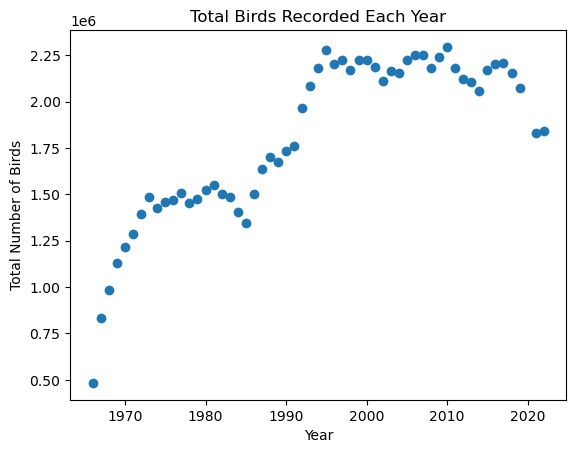

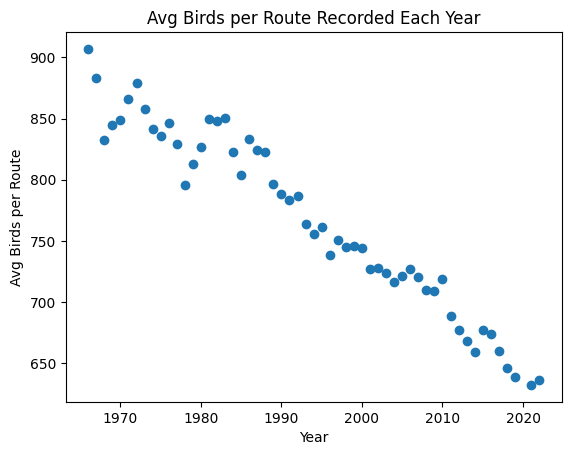

In [31]:
# Raw bird count per year
plt.scatter(birds_by_year['Year'], birds_by_year['SpeciesTotal'])
plt.title("Total Birds Recorded Each Year")
plt.xlabel("Year")
plt.ylabel("Total Number of Birds")
plt.show()

# Bird count normalized by number of routes per year
plt.scatter(birds_by_year['Year'], birds_by_year['AvgBirdsPerRoute'])
plt.title("Avg Birds per Route Recorded Each Year")
plt.xlabel("Year")
plt.ylabel("Avg Birds per Route")
plt.show()


Those two graphs tell two very different stories! If we hadn't realized that more routes had been added over time, we might have erroneously concluded that bird populations were actually increasing overtime. Once we normalized by the number of routes present in any given year, however, the true plight of birds became clear. Of course, the vigilant data scientist might ask whether it's valid to normalize by the number of routes in this way. Maybe routes added later on in the study tended to be in naturally less bird-heavy areas compared to those present from the beginning, and their relative lack of importance is why they weren't originally included. In that case, our division by number of routes would be misleading. Our normalization only makes sense if the types of routes added over time are on average similar to the routes from previous years.

In order to definitively convince ourselves that bird populations are decreasing, let's see if the original routes in the study -- those present from 1966 onwards -- suffered a trend in bird count losses similar to our above graph. 

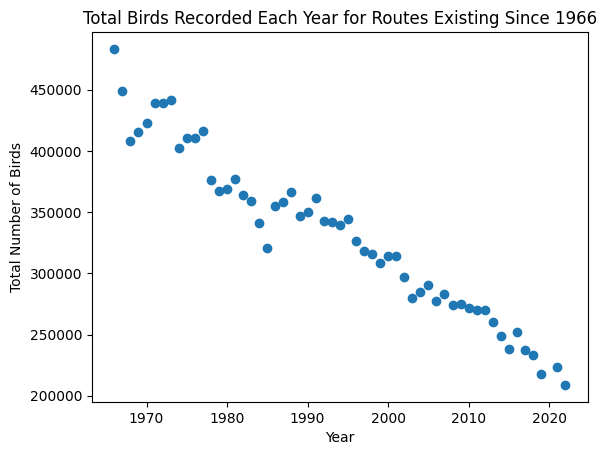

In [134]:
# From interval_stop_copy, get routes that existed in 1966
first_routes = interval_stop_copy[interval_stop_copy['Year'] == 1966]
first_routes = first_routes.drop(['Year'], axis = 1)

# Rejoin these 1966 routes on interval_stop_copy, so that you get bird counts across all years for
# routes having begun in 1966
first_routes = first_routes.merge(interval_stop_copy, how='inner', on=['CountryNum', 'StateNum', 'Route'])
first_routes = first_routes.groupby(['Year']).agg({'SpeciesTotal_MS_y':['sum']})

# Flatten the multiindices in both the columns and rows
first_routes.columns = ['_'.join(col) for col in first_routes.columns.values]
first_routes.reset_index(inplace=True)

first_routes.columns = ['Year', 'SpeciesTotal']

plt.scatter(first_routes['Year'], first_routes['SpeciesTotal'])
plt.title("Total Birds Recorded Each Year for Routes Existing Since 1966")
plt.xlabel("Year")
plt.ylabel("Total Number of Birds")

plt.show()

That's pretty convincing!

Next, we'll see how our bird counts vary with the number of vehicles recorded. We'll merge our interval_stop_copy and vehicles dataframes in order to have both pieces of information in the same place, and more importantly, to restrict the bird counts to routes for which reliable vehicle data was actually recorded.  

In [138]:
intervals_vehicles = interval_stop_copy.merge(vehicles, how='inner', on=['RouteDataID', 'CountryNum', 'StateNum', 'Route', 'Year'])

# Get rid of vehicle counts for individual stops and keep only the interval counts
cols = list(range(0, intervals_vehicles.columns.get_loc('SpeciesTotal_MS') + 1))  + list(range(intervals_vehicles.columns.get_loc('Car_Count10'),intervals_vehicles.columns.get_loc('Car_Total') + 1))
intervals_vehicles = intervals_vehicles.iloc[:, cols]

# Output dataframe to a csv file
intervals_vehicles.to_csv(os.path.join(current_dir, '..', 'SharedData', 'interval_vehicles'), index=False)

intervals_vehicles.head(5)

,RouteDataID,CountryNum,StateNum,Route,Year,Count10_MS,Count20_MS,Count30_MS,Count40_MS,Count50_MS,StopTotal_MS,SpeciesTotal_MS,Car_Count10,Car_Count20,Car_Count30,Car_Count40,Car_Count50,Car_Total
0,6165782,840,34,36,2003,170.0,192.0,204.0,138.0,75.0,317.0,779.0,4.0,5.0,15.0,7.0,0.0,31.0
1,6165783,840,34,38,2003,132.0,252.0,216.0,247.0,137.0,416.0,984.0,0.0,2.0,6.0,3.0,16.0,27.0
2,6165785,840,34,40,2003,479.0,236.0,218.0,219.0,143.0,529.0,1295.0,11.0,97.0,11.0,14.0,40.0,173.0
3,6165786,840,34,44,2003,314.0,295.0,308.0,233.0,289.0,447.0,1439.0,5.0,1.0,1.0,2.0,5.0,14.0
4,6165787,840,34,42,2003,112.0,107.0,137.0,148.0,103.0,335.0,607.0,3.0,28.0,15.0,23.0,12.0,81.0


In [139]:
# There is some necessary code duplication from the creation of the birds_by_year dataframe here
# since vehicle data is only recorded for a subset of routes

birds_cars_by_year = intervals_vehicles[['Year', 'SpeciesTotal_MS', 'Car_Total']].groupby(['Year'])
count = birds_cars_by_year.size()

birds_cars_by_year = birds_cars_by_year.agg({'SpeciesTotal_MS' : ['sum'], 'Car_Total' : ['sum']})

# Flatten the multiindices in both the columns and rows
birds_cars_by_year.columns = ['_'.join(col) for col in birds_cars_by_year.columns.values]
birds_cars_by_year.reset_index(inplace=True)

birds_cars_by_year.columns = ['Year', 'SpeciesTotal', 'Car_Total']
count.index = birds_cars_by_year.index
birds_cars_by_year['BirdsPerRoute'] = birds_cars_by_year['SpeciesTotal'] / count

# Rescale vehicle data because there are many more cars than birds
# Rescale it to have the same max and min as BirdsPerRoute
birds_cars_by_year['Car_Total'] = (birds_cars_by_year['Car_Total'] - birds_cars_by_year['Car_Total'].min()) / (birds_cars_by_year['Car_Total'].max() -  birds_cars_by_year['Car_Total'].min())
birds_cars_by_year['Car_Total'] =  birds_cars_by_year['Car_Total'] * (birds_cars_by_year['BirdsPerRoute'].max() - birds_cars_by_year['BirdsPerRoute'].min()) + birds_cars_by_year['BirdsPerRoute'].min()

# Output dataframe to a csv file
birds_cars_by_year.to_csv(os.path.join(current_dir, '..', 'SharedData', 'birds_cars_by_year.csv'), index=False)

birds_cars_by_year.head(5)

,Year,SpeciesTotal,Car_Total,BirdsPerRoute
0,1982,897.0,556.236842,897.000000
1,1997,21137.0,558.791677,556.236842
2,1998,1580611.0,775.447975,741.027192
3,1999,1659924.0,809.964311,745.363269
4,2000,1672287.0,793.514305,746.223561


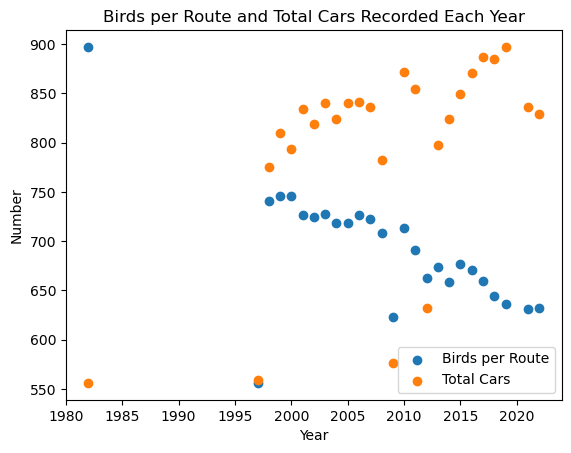

In [140]:
plt.scatter(birds_cars_by_year['Year'], birds_cars_by_year['BirdsPerRoute'])
plt.scatter(birds_cars_by_year['Year'], birds_cars_by_year['Car_Total'])
plt.title("Birds per Route and Total Cars Recorded Each Year")
plt.xlabel("Year")
plt.ylabel("Number")
plt.legend(['Birds per Route', 'Total Cars'])
plt.show()

There seems to be some correlation. Of course, this doesn't mean there's a causal relationship -- maybe  both the number of cars and the number of birds per route both vary with time, but are caused by independent factors. That said, we hope to in the "Hypothesis Testing and Machine Learning" create a model that will allow us to predict bird loss. If variables like the number of cars are correlated with that loss, we can use it in our prediction. With that in mind, let's move on to processing environmental data that, like the number of cars on the road, is related the development of human infrastructure and subsequent damage to natural areas. 

To-do: in our linear regression, can we include time as a factor in and of itself in order to try and account for spurious relationships?

**Processing Routes in the BBS Dataset**

In order to combine BBS data with FIPS/county information and map the data, we need to use Latitude and Longitude to determine additional geospatial information for each route.

In [ ]:
# TODO

### Processing Global Forest Watch Deforestation Data

### Processing National Center for Health Statistics Urban-Rural Classification (By County)

### Processing Open Energy Data Initiative: City and County Commercial Building Inventories

### Processing National Centers for Environmental Information: Average Temperature Time Series

## Exploratory Data Analysis and Visualization
Now that we have all of this data, we want to develop an understanding of what the data tells us and how different factors interact with each other. This section is largely exploratory, meaning we are playing with some different visualizations and relationships to determine what questions we want to ask and what we want to consider in our models. Some of the visualizations are also useful for outreach purposes; the ways in which data is presented dictate how people interpret it. In other words, a data scientist focusing on outreach must carefully think about how they want data to be received and understood to powerfully impact the target audience.

We are interested in both spatial and temporal relationships in the data. In other words, we want to understand how our metrics (bird population/population decline, environmental factors) vary both in time and across the country. We therefore make extensive use of plots showing time series (with date or some analogous metric on the independent axis) and of color gradient plots showing how certain metrics vary over a map of the United States.

### Visualizing the North American Breeding Bird Survey Dataset

As we saw in the "Processing North American Breeding Bird Survey Dataset," the number of birds per route shows an almost linear decline as time goes on. Let's find some numbers to model this decline with linear regression.

Slope: -4.389878551898298
Intercept: [9518.91022225]


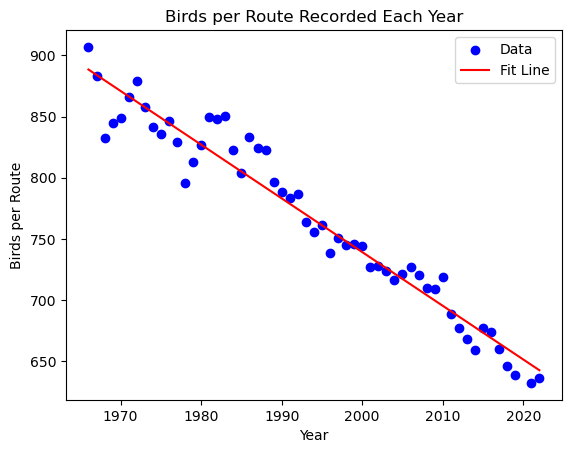

In [45]:
# Structure the data for use in Linear Regression
years = np.reshape(np.array(birds_by_year['Year']), (-1, 1))
birds_per_route = np.reshape(np.array(birds_by_year['BirdsPerRoute']), (-1, 1))

# Make the LinearRegression Fit
birds_by_year_reg = LinearRegression().fit(years, birds_per_route)
birds_by_year_slope = birds_by_year_reg.coef_[0, 0]
birds_by_year_int = birds_by_year_reg.intercept_
print('Slope: ' + str(birds_by_year_slope))
print('Intercept: ' + str(birds_by_year_int))

# Plot the relationship with a trend/fit line
plt.scatter(birds_by_year['Year'], birds_by_year['BirdsPerRoute'], color='blue', label='Data')
plt.title("Birds per Route Recorded Each Year")
plt.xlabel("Year")
plt.ylabel("Birds per Route")
plt.plot(birds_by_year['Year'], birds_by_year_int + birds_by_year_slope*birds_by_year['Year'], label='Fit Line', color='red')
plt.legend()
plt.show()

The slope tells us that we are losing around 4.4 birds per route every year. Let's see how this translates to total population expectations.

In [44]:
# Using an estimated 3000 total routes, calculate how many birds are lost each year (on average)
# TODO get exact number of routes for 2022?
routes = 3000
bird_loss = routes*birds_by_year_slope
print('Estimated Bird Loss Each Year: ' + str(bird_loss))

# Calculate the number of birds we would have seen in 1966 if we had 3000 routes
bird_pop_1966 = routes*birds_by_year.at[0, 'BirdsPerRoute']

print('Estimated Bird Population Count in 1966 Assuming 3000 Routes: ' + str(bird_pop_1966))

#print(birds_by_year.loc[birds_by_year['Year']==2022])
bird_pop_2022 = birds_by_year.loc[55, 'SpeciesTotal'] #TODO
print('Bird Population Count in 2022: ' + str(bird_pop_2022))

Estimated Bird Loss Each Year: -13169.635655694894
Estimated Bird Population Count in 1966 Assuming 3000 Routes: 2720696.0600375235
Bird Population Count in 2022: 1840465.0


That is a pretty dramatic decline. Of course, in any bird count not all of the birds in the United States can be counted. More complex models are used to predict total bird populations based on what is covered in the counts. But the trend we see here confirms significant bird population decline.

We have seen how bird population varies temporally, now lets consider how it varies spatially. To do so, we'll map bird populations over the United States for several different years.

In [52]:
# Read in the routes with FIPS CSV created above.
routes_FIPS_df = pd.read_csv(os.path.join(current_dir, '..', 'SharedData', 'Routes_with_FIPS.csv'), dtype={'StateFIPS': str, 'CountyFIPS': str, 'FIPS': str})

# Merge the interval_stop_copy dataframe with routes_FIPS_df. This adds columns with the
# corresponding latitude, longitude, State, County, and FIPS for each route. With this, we can map
# bird counts on each route.
interval_stop_copy_merged = interval_stop_copy.merge(routes_FIPS_df, how='left', left_on=['StateNum', 'Route'], right_on=['StateNum', 'Route'])
interval_stop_copy_merged.head(5)

,RouteDataID,CountryNum_x,StateNum,Route,Year,Count10_MS,Count20_MS,Count30_MS,Count40_MS,Count50_MS,...,Longitude,Stratum,BCR,RouteTypeID,RouteTypeDetailID,StateName,CountyName,StateFIPS,CountyFIPS,FIPS
0,6165530,840,52,32,1968,182.0,207.0,191.0,191.0,194.0,...,-94.665483,32,22,1,1,Missouri,Buchanan,29,021,29021
1,6165531,840,52,35,1968,159.0,139.0,132.0,135.0,116.0,...,-93.556344,32,22,1,1,Missouri,Grundy,29,079,29079
2,6165532,840,52,36,1968,193.0,225.0,170.0,160.0,162.0,...,-94.852829,32,22,1,1,Missouri,Andrew,29,003,29003
3,6165533,840,53,5,1968,84.0,97.0,96.0,114.0,210.0,...,-111.622297,38,11,1,1,Montana,Toole,30,101,30101
4,6165534,840,53,2,1968,95.0,76.0,76.0,88.0,91.0,...,-114.461929,65,10,1,1,Montana,Flathead,30,029,30029


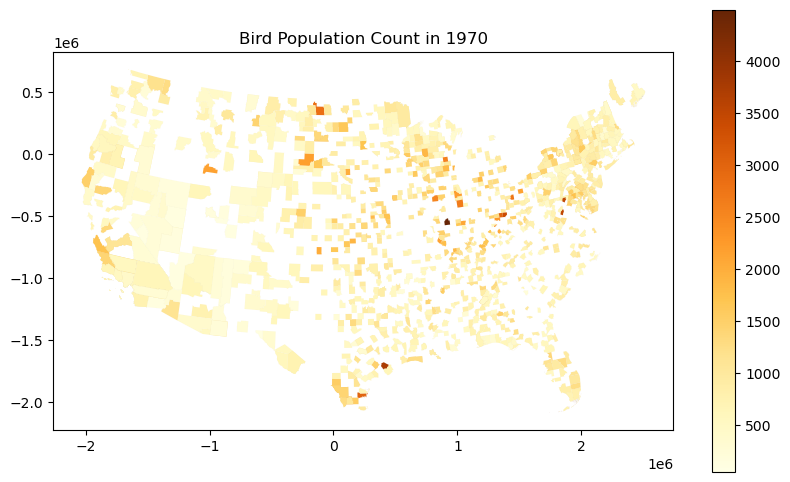

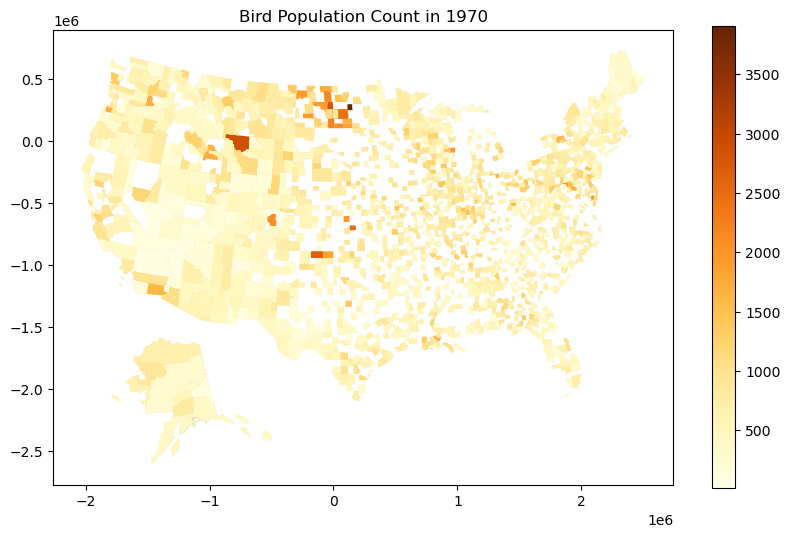

In [54]:
# Combine with county polygon data using geopandas
counties = gpd.read_file(os.path.join(current_dir, '..', 'SharedData', 'Counties2', 'us_county.shp')).rename(columns={"GEOID": "FIPS"})

interval_stop_copy_map = counties.merge(interval_stop_copy_merged, how="left", left_on="FIPS", right_on="FIPS")

# Plot the map for 1970
column_to_plot = 'SpeciesTotal_MS'
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
interval_stop_copy_map.loc[interval_stop_copy_map['Year']==1970].plot(column=column_to_plot, cmap='YlOrBr', linewidth=0.01, ax=ax, edgecolor='0.8', legend=True)
plt.title('Bird Population Count in 1970')
plt.show()

# Plot the map for 2022
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
interval_stop_copy_map.loc[interval_stop_copy_map['Year']==2022].plot(column=column_to_plot, cmap='YlOrBr', linewidth=0.01, ax=ax, edgecolor='0.8', legend=True)
plt.title('Bird Population Count in 2022')
plt.show()

Let's now map the fractional change in birds per route between 1966 and 2022 (birds per route in 2022/birds per route in 1966).

In [ ]:
iscm_by_year = interval_stop_copy_merged[['Year', 'SpeciesTotal_MS']].groupby(['Year'])
count = iscm_by_year.size()

birds_by_year = birds_by_year.agg({'SpeciesTotal_MS' : ['sum']})

Let's consider changes for a single bird species common to the Maryland area - the red-winged blackbird. TODO - consider other common species and their drastic decline?

## Hypothesis Testing and Machine Learning
Now, we attempt to create several predictive models which will allow us to predict things like bird population and population decline based on myriad environmental factors. Such models will allow us to predict likely future trends and values based on previous data. Additionally, analyzing the data through these models will allow us to understand which environmental factors are the most significant predictors of bird population decline. Through this statistical analysis, we can begin to understand what practices are most harmful to bird populations, giving us some insight about policy decision which will reduce population decline in the future.

## Insight and Policy Decision
In this part of the data science pipeline, we interpret what our visualizations and models are telling us about the data. We considered a wide variety of factors and tested them for significance in their effects on bird population. 



TODO - include links throughout pointing to different aspects of data science process